# Example 1: 2 circles in 2D

In this example, we use the PLoM to learn the intrinsic structure of the training data and generate replicas drawn from the same statistical distribution.

The training data consists of 400 data points that lie around two circles of different diameters (plotted below).

## Importing modules

In this notebook, it is assumed that the PLoM package is installed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plom import PLoM

## Loading training data
Rows are observations, columns are features.

In [7]:
X_train = np.loadtxt('data/training_2circles_data_e0.15.txt')
print(X_train.shape)

(400, 2)


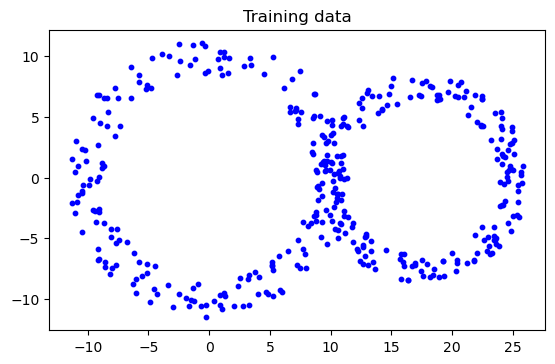

In [8]:
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], color='b', s=10, label='Training')
plt.gca().set_aspect('equal')
plt.title('Training data')
plt.show()

## PLoM run

### Initialize model

In [5]:
model = PLoM(
    # Pipeline Control
    use_scaling=True,
    use_pca=True,
    use_dmaps=True,
    projection_source='pca',    # Project PCA coefficients to Manifold
    projection_target='dmaps',  # Use DMAPS basis for projection
    
    # Hyperparameters
    pca_cum_energy=0.99,        # Keep 99% variance
    dmaps_epsilon='auto',       # Auto-tune kernel width
    ito_steps='auto',           # Auto-calc integration steps
    n_jobs=1,                  # Use 1 core to ensure consistency with legacy code via seeding
    ito_potential_method='auto',
    verbose=2
)

PLoM C++ backend loaded: potential_eigen.dll


### Fit model

In [10]:
model.fit(X_train)


PLoM v2.0.0 Fitting... (2026-01-04 15:52:18)

Input data dimensions: (400, 2)

--- Scaling (Normalization) ---
   > Scaling (Normalization) finished in 0.0010s

--- PCA (cum_energy) ---
   > PCA (cum_energy) finished in 0.0010s
   > Dimensions: (400, 2) -> (400, 2)
   > Retained eigenvalues: [1.0485268  0.95648573]
   > Full eigenvalues: [1.0485268  0.95648573]
   > Energy Kept: 1.000000

--- Diffusion Maps ---
   > Searching for optimal epsilon...
   > Diffusion Maps finished in 0.1886s
   > Epsilon: 15.6000
   > Manifold dim (m): 2
   > Manifold top eigenvalues: [0.12291802 0.12095759] [0.01225770 ...]
   > Search history (eps -> m):
        Epsilon | Dim (m)
     -----------+------
         1.0000 | 11   
         2.0000 | 7    
         8.0000 | 4    
        12.0000 | 3    
        14.0000 | 3    
        15.0000 | 3    
        15.5000 | 3    
        15.6000 | 2    
        16.0000 | 2    

--- Projection (Z) ---
   > Projection (Z) finished in 0.0000s
   > Projected data (Z) d

PLoM(use_pca=True, dmaps_epsilon=auto, ito_steps=auto)

### Sampling

In [11]:
n_samples = 5 # Number of new data sets to generate

X_new = model.sample(n_samples=n_samples)


PLoM v2.0.0 Sampling... (2026-01-04 15:53:30)

--- Ito Sampling (5 samples) ---


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    7.5s


   > Ito Sampling (5 samples) finished in 9.7372s
   > Steps taken: 185
   > F_ac = 21.744
   > Generated 2000 points

Sampling Complete in 9.74s (2026-01-04 15:53:39)


[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    9.6s


### DMaps eigenvalues are saved and can be plotted

In [13]:
from plom.plotting import plot_eigenvalues

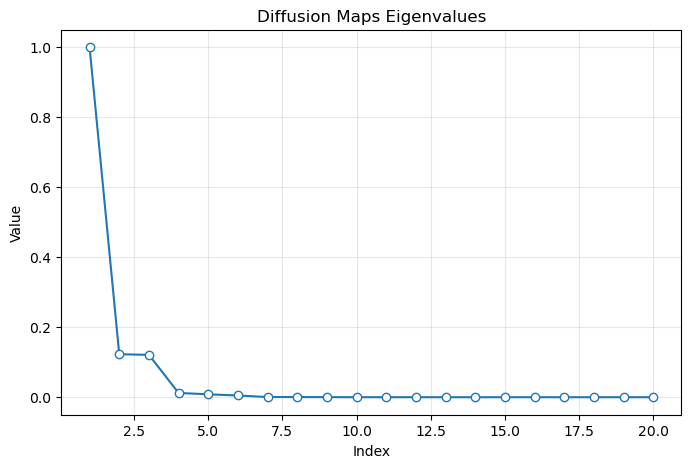

In [14]:
plot_eigenvalues(model)

### 2D plot of training data and generated data

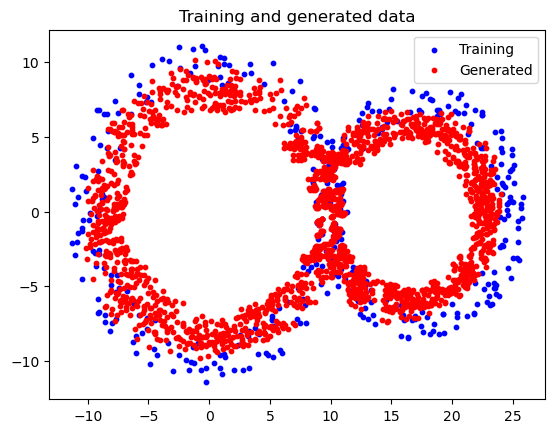

In [15]:
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], color='b', s=10, label='Training')
plt.scatter(X_new[:, 0], X_new[:, 1], color='r', s=10, label='Generated')
plt.title('Training and generated data')
plt.legend()
plt.show()